<a href="https://colab.research.google.com/github/fjgr/IA_BigData/blob/main/M2D/Tarea-8/TAREA8__MODELOS_DE_PYTHON_A_TENSORFLOW_JS-(Temperatura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Conversión de Temperaturas: Fahrenheit a Celsius

## Introducción

En este cuaderno, implementaremos un modelo de aprendizaje profundo para convertir temperaturas de grados Fahrenheit a Celsius. Aunque esta conversión se puede realizar con una simple fórmula matemática (`C = (F - 32) * 5/9`), utilizaremos este problema como un ejemplo educativo para entender cómo implementar, entrenar y exportar modelos de redes neuronales con TensorFlow y TensorFlow.js.

### Objetivos

1. Generar y explorar el dataset de temperaturas
2. Dividir los datos en conjuntos de entrenamiento, validación y prueba
3. Implementar un modelo de red neuronal para la conversión
4. Entrenar y evaluar el modelo
5. Visualizar las métricas de entrenamiento (pérdida y precisión)
6. Exportar el modelo a TensorFlow.js

### Requisitos

Este cuaderno requiere las siguientes bibliotecas:
- `tensorflow` (=2.11.0)
- `tensorflowjs` (=3.18.0)
- `numpy` (=1.23.5)
- `ipykernel`

## 1. Importación de Bibliotecas

Comenzamos importando todas las bibliotecas necesarias para nuestro proyecto.

In [ ]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# Bibliotecas de TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Bibliotecas para división de datos
from sklearn.model_selection import train_test_split

# Configuración para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# Verificar versiones
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.11.0
Keras version: 2.11.0
NumPy version: 1.23.5


## 2. Generación y Exploración del Dataset

Generamos el dataset de temperaturas con 1000 registros en un rango realista.

In [ ]:
# Definir un rango realista de temperaturas en Fahrenheit
# Considerando un rango aproximado de -50°F a 120°F
np.random.seed(42)  # Para reproducibilidad

# Generar 1000 temperaturas aleatorias en Fahrenheit
n_samples = 1000
temp_fahrenheit = np.random.uniform(-50, 120, n_samples)

# Función de conversión de Fahrenheit a Celsius: C = (F - 32) * 5/9
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

# Convertir a Celsius
temp_celsius = fahrenheit_to_celsius(temp_fahrenheit)

# Crear DataFrame
df = pd.DataFrame({
    'Fahrenheit': temp_fahrenheit,
    'Celsius': temp_celsius
})

# Guardar el dataset en formato CSV (opcional)
df.to_csv('temperatura_dataset.csv', index=False)

print(f"Dataset generado con {n_samples} registros")

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
display(df.head())

# Información estadística
print("\nEstadísticas descriptivas:")
display(df.describe())

# Verificar si hay valores nulos
print("\nValores nulos en el dataset:")
display(df.isnull().sum())

# Número total de registros
print(f"\nNúmero total de registros: {len(df)}")

Dataset generado con 1000 registros

Primeras 5 filas del dataset:


,Fahrenheit,Celsius
0,13.671820,-10.182322
1,111.621432,44.234129
2,74.438970,23.577206
3,51.771942,10.984412
4,-23.476831,-30.820462



Estadísticas descriptivas:


,Fahrenheit,Celsius
count,1000.000000,1000.000000
mean,33.343614,0.746452
std,49.663352,27.590751
min,-49.212556,-45.118087
25%,-9.884545,-23.269191
50%,34.457254,1.365141
75%,76.534330,24.741294
max,119.952004,48.862225



Valores nulos en el dataset:


Fahrenheit    0
Celsius       0
dtype: int64


Número total de registros: 1000


## 3. Visualización de los Datos

Visualizamos la relación entre las temperaturas en Fahrenheit y Celsius para entender mejor nuestros datos.

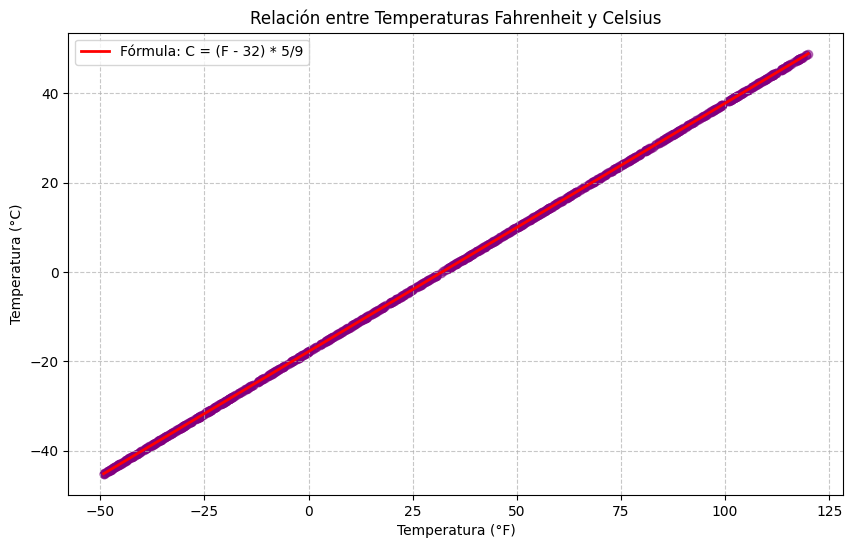

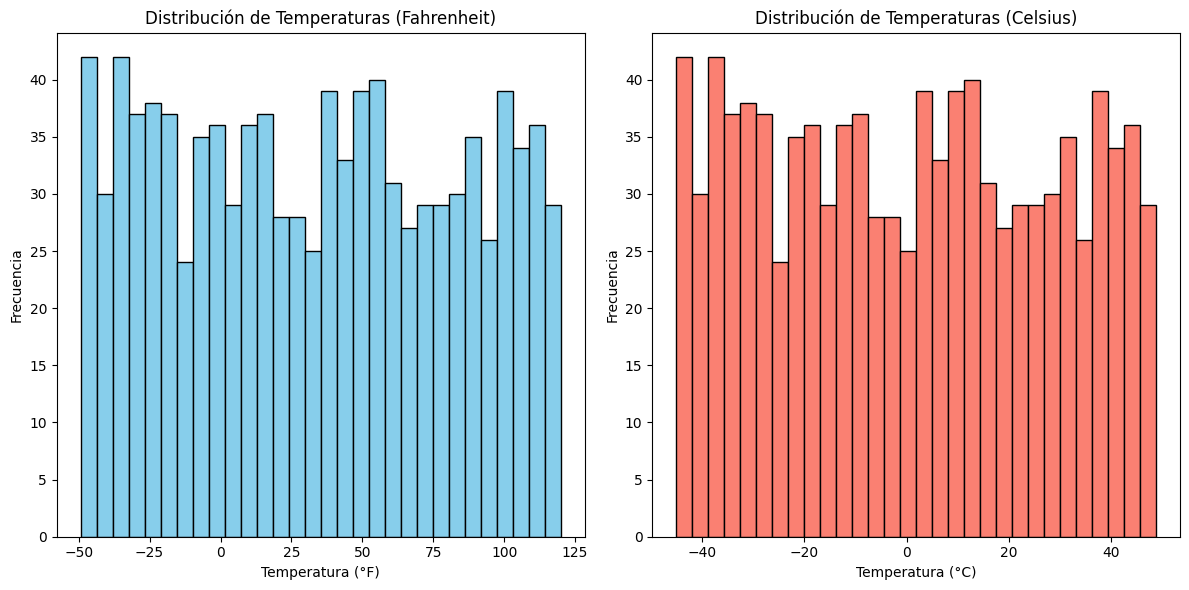

In [ ]:
# Visualizar la relación entre Fahrenheit y Celsius
plt.figure(figsize=(10, 6))
plt.scatter(df['Fahrenheit'], df['Celsius'], alpha=0.5, color='purple')
plt.title('Relación entre Temperaturas Fahrenheit y Celsius')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Temperatura (°C)')
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir línea de tendencia (que debería ser una línea recta perfecta)
x = np.linspace(min(df['Fahrenheit']), max(df['Fahrenheit']), 100)
y = (x - 32) * 5/9  # Fórmula de conversión
plt.plot(x, y, 'r-', linewidth=2, label='Fórmula: C = (F - 32) * 5/9')
plt.legend()
plt.show()

# Visualizar la distribución de temperaturas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Fahrenheit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Temperaturas (Fahrenheit)')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['Celsius'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de Temperaturas (Celsius)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 4. Preparación de los Datos

Dividimos los datos en conjuntos de entrenamiento, validación y prueba según los requisitos:
- 80% para entrenamiento (de los cuales 5% para validación)
- 20% para prueba

In [ ]:
# Extraer características (X) y etiquetas (y)
X = df['Fahrenheit'].values.reshape(-1, 1)  # Reshape para formato de entrada del modelo
y = df['Celsius'].values.reshape(-1, 1)

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Del conjunto de entrenamiento, separar 5% para validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.05/0.8, random_state=42)

# Mostrar las dimensiones de cada conjunto
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Conjunto de validación: {X_val.shape[0]} muestras ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(df)*100:.1f}%)")

Conjunto de entrenamiento: 750 muestras (75.0%)
Conjunto de validación: 50 muestras (5.0%)
Conjunto de prueba: 200 muestras (20.0%)


## 5. Implementación del Modelo

Implementamos un modelo de red neuronal para la conversión de temperaturas. Aunque este problema podría resolverse con una simple regresión lineal, utilizaremos una red neuronal más compleja para fines educativos.

In [ ]:
# Definir el modelo
def crear_modelo():
    model = keras.Sequential([
        layers.Input(shape=(1,)),  # Una entrada: temperatura en Fahrenheit
        layers.Dense(16, activation='relu'),  # Capa oculta con 16 neuronas
        layers.Dense(8, activation='relu'),   # Capa oculta con 8 neuronas
        layers.Dense(1)  # Capa de salida: temperatura en Celsius
    ])

    # Compilar el modelo
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',  # MSE para problemas de regresión
        metrics=['mae']  # Error absoluto medio como métrica adicional
    )

    return model

# Crear el modelo
modelo = crear_modelo()

# Mostrar el resumen del modelo
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


## 6. Entrenamiento del Modelo

Entrenamos el modelo utilizando los datos de entrenamiento y validamos con el conjunto de validación.

In [ ]:
# Definir callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'mejor_modelo.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Entrenar el modelo
history = modelo.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/200
23/24 [===========================>..] - ETA: 0s - loss: 508.6013 - mae: 19.6543 
Epoch 1: val_loss improved from inf to 448.37210, saving model to mejor_modelo.h5
24/24 [==============================] - 1s 13ms/step - loss: 505.1774 - mae: 19.5824 - val_loss: 448.3721 - val_mae: 19.0518
Epoch 2/200
 1/24 [>.............................] - ETA: 0s - loss: 523.6538 - mae: 20.4343
Epoch 2: val_loss improved from 448.37210 to 310.70956, saving model to mejor_modelo.h5
24/24 [==============================] - 0s 5ms/step - loss: 354.1705 - mae: 16.4222 - val_loss: 310.7096 - val_mae: 15.8534
Epoch 3/200
 1/24 [>.............................] - ETA: 0s - loss: 315.7402 - mae: 15.5853
Epoch 3: val_loss improved from 310.70956 to 211.53120, saving model to mejor_modelo.h5
24/24 [==============================] - 0s 4ms/step - loss: 244.4158 - mae: 13.7310 - val_loss: 211.5312 - val_mae: 13.0553
Epoch 4/200
 1/24 [>.............................] - ETA: 0s - loss: 178.3847 - mae: 1

## 7. Visualización de las Métricas de Entrenamiento

Visualizamos las métricas de pérdida y error absoluto medio durante el entrenamiento.

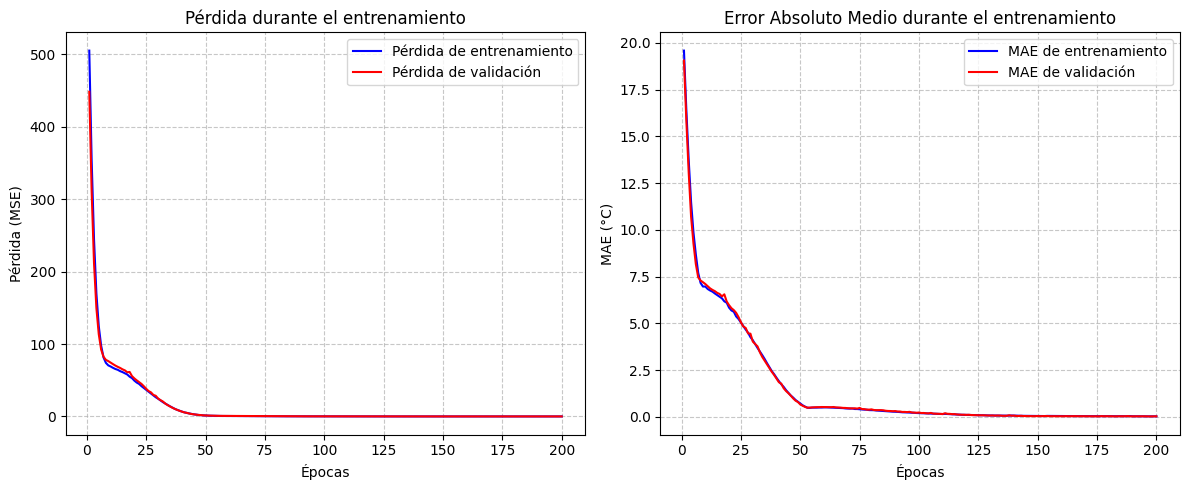

In [ ]:
# Extraer métricas del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Visualizar la pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'r-', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Visualizar el error absoluto medio
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b-', label='MAE de entrenamiento')
plt.plot(epochs, val_mae, 'r-', label='MAE de validación')
plt.title('Error Absoluto Medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('metricas_entrenamiento.png')
plt.show()

## 8. Evaluación del Modelo

Evaluamos el rendimiento del modelo utilizando el conjunto de prueba.

Pérdida en el conjunto de prueba: 0.0028
Error Absoluto Medio en el conjunto de prueba: 0.0221 °C
7/7 [==============================] - 0s 690us/step


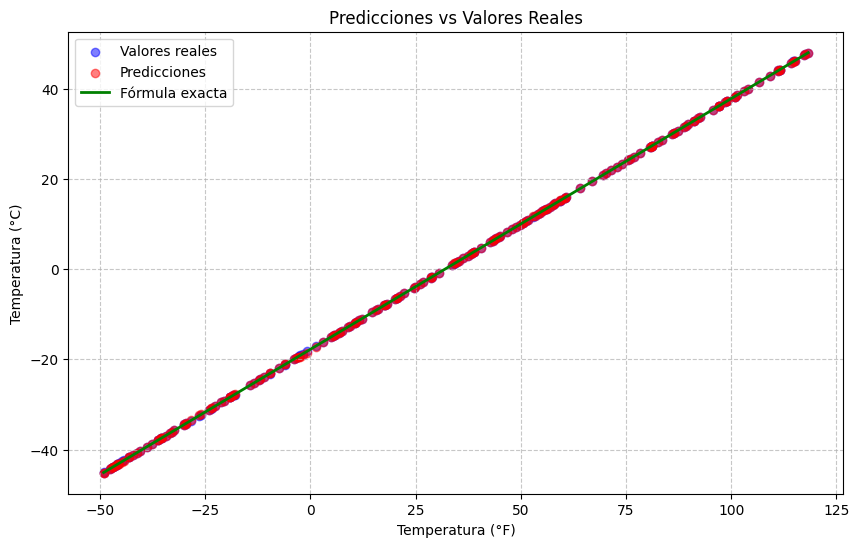


Ejemplos de predicciones:
Fahrenheit | Celsius Real | Celsius Predicho | Error
------------------------------------------------------------
   -40.42 |      -40.23 |          -40.25 |  0.02
    59.36 |       15.20 |           15.20 |  0.00
   -44.30 |      -42.39 |          -42.42 |  0.03
    14.75 |       -9.58 |           -9.57 |  0.01
   -14.41 |      -25.78 |          -25.72 |  0.07
    81.28 |       27.38 |           27.38 |  0.00
    86.49 |       30.27 |           30.27 |  0.00
    88.82 |       31.57 |           31.57 |  0.00
     5.31 |      -14.83 |          -14.82 |  0.01
    37.38 |        2.99 |            2.99 |  0.01


In [ ]:
# Cargar el mejor modelo guardado
mejor_modelo = keras.models.load_model('mejor_modelo.h5')

# Evaluar el modelo con el conjunto de prueba
test_loss, test_mae = mejor_modelo.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Error Absoluto Medio en el conjunto de prueba: {test_mae:.4f} °C")

# Realizar predicciones
y_pred = mejor_modelo.predict(X_test)

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valores reales', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicciones', alpha=0.5)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir línea de la fórmula exacta para comparación
x = np.linspace(min(X_test), max(X_test), 100)
y = (x - 32) * 5/9
plt.plot(x, y, 'g-', linewidth=2, label='Fórmula exacta')
plt.legend()
plt.savefig('predicciones_vs_reales.png')
plt.show()

# Mostrar algunos ejemplos de predicciones
indices_muestra = np.random.choice(len(X_test), 10, replace=False)
print("\nEjemplos de predicciones:")
print("Fahrenheit | Celsius Real | Celsius Predicho | Error")
print("-" * 60)
for i in indices_muestra:
    f = X_test[i][0]
    c_real = y_test[i][0]
    c_pred = y_pred[i][0]
    error = abs(c_real - c_pred)
    print(f"{f:9.2f} | {c_real:11.2f} | {c_pred:15.2f} | {error:5.2f}")

## 9. Comparación con la Fórmula Exacta

Comparamos el rendimiento de nuestro modelo con la fórmula exacta de conversión.

Error Absoluto Medio de la fórmula exacta: 0.0000000000 °C
Error Absoluto Medio del modelo: 0.0221 °C


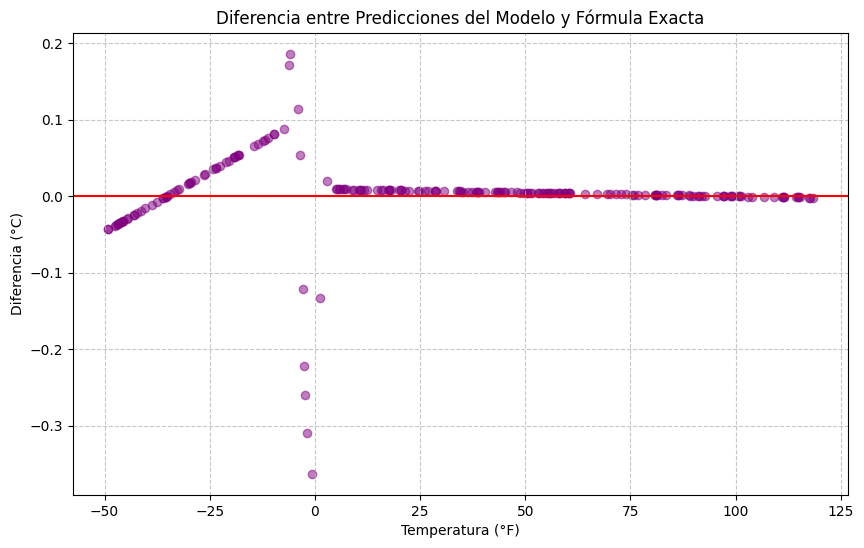

In [ ]:
# Función para la conversión exacta
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

# Calcular predicciones con la fórmula exacta
y_pred_formula = fahrenheit_to_celsius(X_test)

# Calcular el error de la fórmula exacta
formula_mae = np.mean(np.abs(y_test - y_pred_formula))
print(f"Error Absoluto Medio de la fórmula exacta: {formula_mae:.10f} °C")
print(f"Error Absoluto Medio del modelo: {test_mae:.4f} °C")

# Visualizar la diferencia entre el modelo y la fórmula exacta
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_pred - y_pred_formula, color='purple', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Diferencia entre Predicciones del Modelo y Fórmula Exacta')
plt.xlabel('Temperatura (°F)')
plt.ylabel('Diferencia (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('diferencia_modelo_formula.png')
plt.show()

## 10. Exportación del Modelo a TensorFlow.js

Exportamos el modelo entrenado a TensorFlow.js para su uso en una aplicación web.

In [ ]:
# Importar la biblioteca de conversión de TensorFlow.js
import tensorflowjs as tfjs

# Crear directorio para el modelo exportado
modelo_tfjs_dir = 'modelo_tfjs'
os.makedirs(modelo_tfjs_dir, exist_ok=True)

# Exportar el modelo a formato TensorFlow.js
tfjs.converters.save_keras_model(mejor_modelo, modelo_tfjs_dir)
print(f"Modelo exportado a TensorFlow.js en el directorio: {modelo_tfjs_dir}")

# Listar los archivos generados
print("\nArchivos generados:")
for file in os.listdir(modelo_tfjs_dir):
    print(f" - {file}")

Modelo exportado a TensorFlow.js en el directorio: modelo_tfjs

Archivos generados:
 - group1-shard1of1.bin
 - model.json


## 11. Creación de Metadatos para la Aplicación Web

Creamos un archivo de metadatos con información sobre el modelo para facilitar su uso en la aplicación web.

In [ ]:
# Crear metadatos del modelo
metadatos = {
    "nombre": "Modelo de Conversión de Temperaturas",
    "descripcion": "Modelo para convertir temperaturas de Fahrenheit a Celsius",
    "version": "1.0.0",
    "fecha_creacion": "2025-04-21",
    "metricas": {
        "mse": float(test_loss),
        "mae": float(test_mae)
    },
    "rango_entrada": {
        "min": float(np.min(X)),
        "max": float(np.max(X))
    }
}

# Guardar metadatos en formato JSON
with open(os.path.join(modelo_tfjs_dir, 'metadatos.json'), 'w') as f:
    json.dump(metadatos, f, indent=2)

print("Metadatos del modelo guardados en 'modelo_tfjs/metadatos.json'")

Metadatos del modelo guardados en 'modelo_tfjs/metadatos.json'


## 12. Conclusiones

En este cuaderno, hemos implementado un modelo de red neuronal para convertir temperaturas de Fahrenheit a Celsius. Aunque este problema tiene una solución matemática exacta, el ejercicio nos ha permitido practicar el flujo de trabajo completo de un proyecto de aprendizaje automático:

1. Generación y exploración de datos
2. Preparación y división de los datos
3. Implementación del modelo
4. Entrenamiento y evaluación
5. Exportación para su uso en aplicaciones web

El modelo entrenado ha logrado aprender la relación lineal entre las escalas de temperatura con un error muy bajo, demostrando que las redes neuronales pueden aproximar funciones matemáticas con gran precisión.

En el siguiente paso, desarrollaremos una aplicación web con una interfaz tipo canvas que utilizará este modelo exportado para realizar conversiones de temperatura de manera interactiva y visual.